## Classify Image Orientation using Convolution Neural Network

In [1]:
# To download datasets from Hugginf Face Hub
#pip install datasets


In [2]:
# Import required libraries

import datasets
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense,LeakyReLU,Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
# Initial 20 'cifar100' images used for model
from datasets import load_dataset, Image

dataset = load_dataset("cifar100", split="train[:20]")
dataset

Reusing dataset cifar100 (C:\Users\famil\.cache\huggingface\datasets\cifar100\cifar100\1.0.0\f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142)


Dataset({
    features: ['img', 'fine_label', 'coarse_label'],
    num_rows: 20
})

In [4]:
# Type of Image
type(dataset[5]["img"])

PIL.PngImagePlugin.PngImageFile

In [5]:
# Images converted to numpy array for processing
im0 = np.asarray(dataset[0]["img"])
print(im0.shape)


(32, 32, 3)


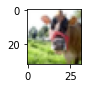

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(im0)

#Synthetically turned the images upside down and created the training and test datasets
using tf.image.flip_up_down(image)

In [7]:
# Load dataset

dataset=r'path\vision'

In [8]:
# Defined Parameters
batch_size = 32
img_height = 32
img_width = 32

In [9]:
# Data Preparation for developing the model - 80% of images for training dataset and 20% of images for validation dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
                                              dataset,
                                              validation_split=0.2,
                                              subset="training",
                                              seed=123,
                                              image_size=(img_height, img_width),
                                              batch_size=batch_size)

Found 40 files belonging to 2 classes.
Using 32 files for training.


In [10]:
test_ds = tf.keras.utils.image_dataset_from_directory(
                                             dataset,
                                              validation_split=0.2,
                                              subset="validation",
                                              seed=123,
                                              image_size=(img_height, img_width),
                                              batch_size=batch_size)

Found 40 files belonging to 2 classes.
Using 8 files for validation.


In [11]:
# Image Labels
class_names = train_ds.class_names
print(class_names)

['flipped_down', 'original']


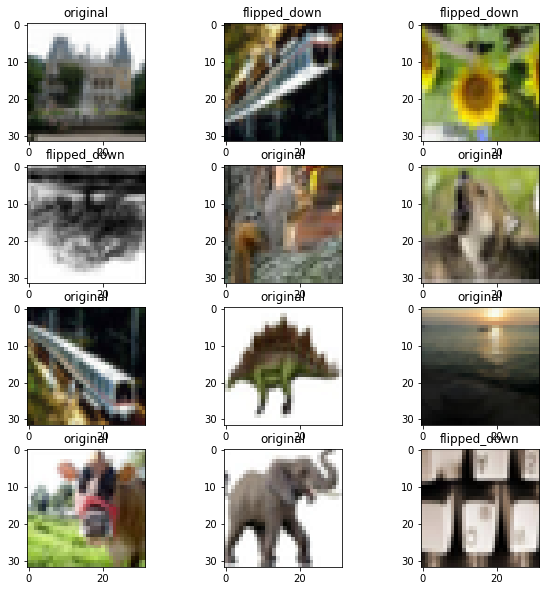

In [12]:
# Some images

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        #plt.axis("off")

In [13]:
# Shape of images 
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 32, 32, 3)
(32,)


In [14]:
# Normalize the data between 0 and 1

normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
#  pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Model creation

In [15]:


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3),
                      input_shape = (32,32, 3),
                      activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3:DropOut
classifier.add(Dropout(0.2))


# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))
 
# Compiling the CNN
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

# Architecture
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         1

In [16]:

#Fit the model
history=classifier.fit(train_ds,validation_data=test_ds,epochs = 30)


Epoch 1/30
1/1 [==============================] - 1s 583ms/step - loss: 8.0759 - accuracy: 0.4688 - val_loss: 65.8844 - val_accuracy: 0.3750
Epoch 2/30
1/1 [==============================] - 0s 55ms/step - loss: 56.8379 - accuracy: 0.5312 - val_loss: 44.0042 - val_accuracy: 0.3750
Epoch 3/30
1/1 [==============================] - 0s 53ms/step - loss: 37.1723 - accuracy: 0.5312 - val_loss: 19.3329 - val_accuracy: 0.3750
Epoch 4/30
1/1 [==============================] - 0s 53ms/step - loss: 15.8756 - accuracy: 0.5312 - val_loss: 1.9650 - val_accuracy: 0.3750
Epoch 5/30
1/1 [==============================] - 0s 53ms/step - loss: 1.4472 - accuracy: 0.5625 - val_loss: 7.1783 - val_accuracy: 0.6250
Epoch 6/30
1/1 [==============================] - 0s 52ms/step - loss: 10.0546 - accuracy: 0.4688 - val_loss: 7.2428 - val_accuracy: 0.6250
Epoch 7/30
1/1 [==============================] - 0s 53ms/step - loss: 10.8675 - accuracy: 0.4688 - val_loss: 5.4277 - val_accuracy: 0.6250
Epoch 8/30
1/1 [==

1/1 - 0s - loss: 0.2398 - accuracy: 0.9688 - 24ms/epoch - 24ms/step
1/1 - 0s - loss: 1.0513 - accuracy: 0.3750 - 18ms/epoch - 18ms/step


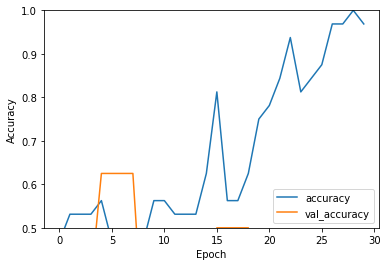

In [17]:
# Plot the Accuracy and Validation accuracy of model 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Model Evaluation
train_loss, train_acc = classifier.evaluate(train_ds,verbose=2)

test_loss, test_acc = classifier.evaluate(test_ds,verbose=2)


In [18]:
print("Training Loss and Training Accuracy :",train_loss, train_acc)
print("\nValidation Loss and Validation Accuracy :",test_loss, test_acc)

Training Loss and Training Accuracy : 0.23982076346874237 0.96875

Validation Loss and Validation Accuracy : 1.0513066053390503 0.375


In [19]:
# Save the model
classifier.save("orientation.h5")

# Testing Model

In [20]:
# Testing Images

test_image1=image.load_img(r"C:\Users\famil\OneDrive\Varsha\Python\AI_Programs\vision_test\flippeddown1.png",target_size=(32,32))

test_image2=image.load_img(r"C:\Users\famil\OneDrive\Varsha\Python\AI_Programs\vision_test\flippeddown2.png",target_size=(32,32))

test_image3=image.load_img(r"C:\Users\famil\OneDrive\Varsha\Python\AI_Programs\vision_test\original1.png",target_size=(32,32))

test_image4=image.load_img(r"C:\Users\famil\OneDrive\Varsha\Python\AI_Programs\vision_test\original2.png",target_size=(32,32))

In [21]:
print(type(test_image1),type(test_image2)) # PIL-Python Image Library

<class 'PIL.PngImagePlugin.PngImageFile'> <class 'PIL.PngImagePlugin.PngImageFile'>


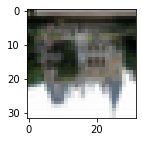

In [22]:
# Orientation changed - Flipped Image
plt.figure(figsize=(2,2))
plt.imshow(test_image1)

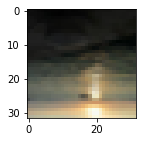

In [23]:
# Orientation changed - Flipped Image
plt.figure(figsize=(2,2))
plt.imshow(test_image2)

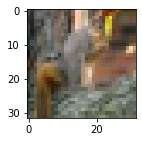

In [24]:
# Original Image
plt.figure(figsize=(2,2))
plt.imshow(test_image3)

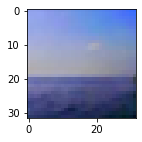

In [25]:
# Original Image
plt.figure(figsize=(2,2))
plt.imshow(test_image4)

In [26]:
# Convert image to numpy array

test_image1_arr = np.asarray(test_image1)
test_image2_arr = np.asarray(test_image2)
test_image3_arr = np.asarray(test_image3)
test_image4_arr = np.asarray(test_image4)


In [27]:
test_image1_arr.shape

(32, 32, 3)

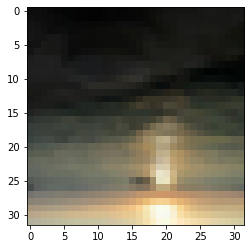

In [28]:
plt.imshow(test_image2_arr)

In [29]:
# expand dimension by rows i.e by samples i.e axis=0(first axis) -sample axis and second axis-axis=1 is feature axis
test_image1_arr=np.expand_dims(test_image1_arr,axis=0) 

# changing image as a row of image
test_image2_arr=np.expand_dims(test_image2_arr,axis=0)
test_image3_arr=np.expand_dims(test_image3_arr,axis=0)
test_image4_arr=np.expand_dims(test_image4_arr,axis=0)

In [30]:
test_image1_arr.shape,test_image2_arr.shape

((1, 32, 32, 3), (1, 32, 32, 3))

In [31]:
# Load the model
my_model=load_model("orientation.h5")

In [32]:
result1=my_model.predict(test_image1_arr)

if result1[0][0]==1: #result[0][0]
    print("Orientation-Original")
else:
    print("Orientation changed_flipped down")

Orientation changed_flipped down


In [33]:
result2=my_model.predict(test_image2_arr)
if result2[0][0]==1: #result[0][0]
    print("Orientation-Original")
else:
    print("Orientation changed_flipped down")

Orientation changed_flipped down


In [34]:
result3=my_model.predict(test_image3_arr)
if result3[0][0]==1: #result[0][0]
    print("Orientation-Original")
else:
    print("Orientation changed_flipped down")

Orientation changed_flipped down


In [35]:
result4=my_model.predict(test_image4_arr)
if result4[0][0]==1: #result[0][0]
    print("Orientation-Original")
else:
    print("Orientation changed_flipped down")

Orientation changed_flipped down
